In [13]:
import matplotlib.pyplot as plt
from os import listdir
import numpy as np

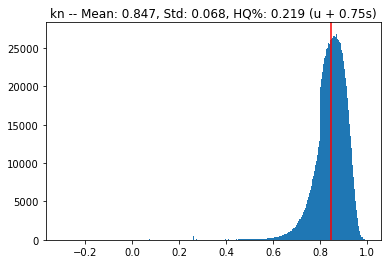

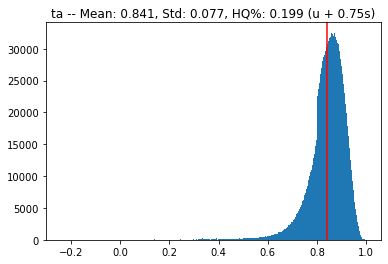

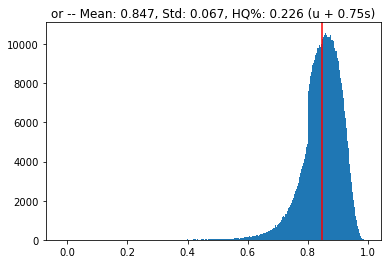

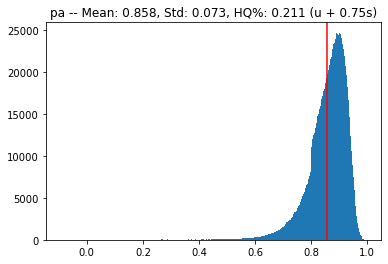

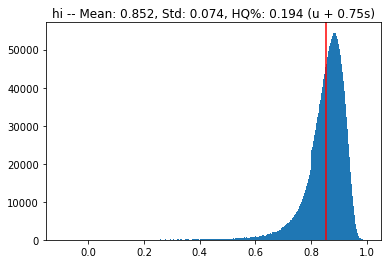

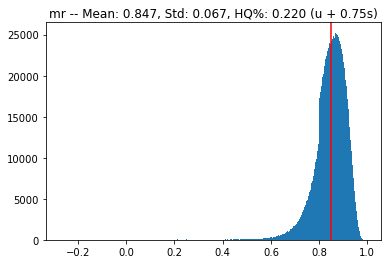

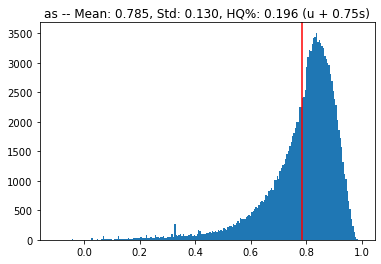

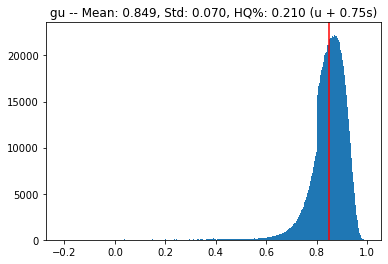

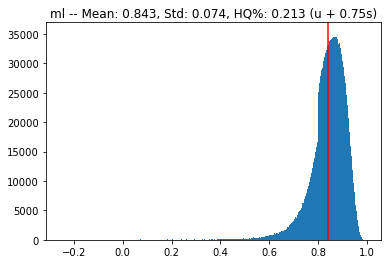

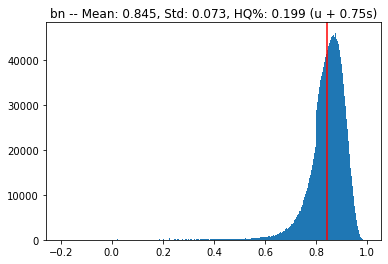

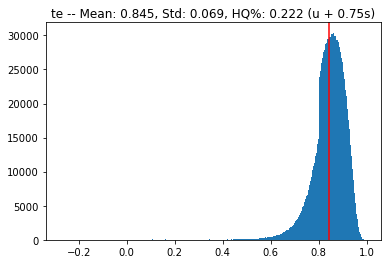

10312433 49774246

Aggregate percentage of HQ data: 0.207


In [31]:
base_path = "../data/v2_distilled_indic_en"
hq_total, total, eps = 0, 0, 0.75

for lang_pair in listdir(base_path):
    lang = lang_pair.split('-')[1]
    with open(f"{base_path}/{lang_pair}/scores.txt") as f:
        data = np.array([float(a) for a in f.readlines()])
    u, s = np.mean(data), np.std(data)
    hq_len = np.sum(data > u + eps*s)
    hq_total += hq_len
    total += len(data)
    # plot
    plt.hist(data, bins="auto")
    plt.axvline(x=u, color = 'r')
    plt.title(f"{lang} -- Mean: {u:.3f}, Std: {s:.3f}, HQ%: {(hq_len/len(data)):.3f} (u + {eps}s)")
    plt.show()

print(f"{hq_total} {total}")
print(f"\nAggregate percentage of HQ data: {(hq_total/total):.3f}")